In [2]:
import numpy as np
import os
import cv2

# Define the target size for resizing the images
target_size = (100, 100)  # Adjust this according to your needs

# Define the paths to your data directories
closed_eyes_dir = "train/Closed_Eyes"
open_eyes_dir = "train/Open_Eyes"

# Initialize lists to store the images and their labels
images = []
labels = []

# Load closed eyes images
for filename in os.listdir(closed_eyes_dir):
    if filename.endswith(".png"):  # assuming your images are PNG files
        image_path = os.path.join(closed_eyes_dir, filename)
        image = cv2.imread(image_path)
        # Resize the image to the target size
        image = cv2.resize(image, target_size)
        # Optionally, you can perform preprocessing here if needed
        images.append(image)
        labels.append(0)  # Assuming 0 represents closed eyes

# Load open eyes images
for filename in os.listdir(open_eyes_dir):
    if filename.endswith(".png"):  # assuming your images are PNG files
        image_path = os.path.join(open_eyes_dir, filename)
        image = cv2.imread(image_path)
        # Resize the image to the target size
        image = cv2.resize(image, target_size)
        # Optionally, you can perform preprocessing here if needed
        images.append(image)
        labels.append(1)  # Assuming 1 represents open eyes

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

print("Images shape:", images.shape)
print("Labels shape:", labels.shape)


Images shape: (4000, 100, 100, 3)
Labels shape: (4000,)


In [ ]:
#Images shape: (4000, 100, 100, 3): This indicates that you have 4000 images, each with a resolution of 100x100 pixels, and each pixel represented in RGB format (3 channels).

#Labels shape: (4000,): This indicates that you have corresponding labels for each image, with 4000 labels in total.

In [3]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training images shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Testing images shape:", X_test.shape)
print("Testing labels shape:", y_test.shape)


Training images shape: (3200, 100, 100, 3)
Training labels shape: (3200,)
Testing images shape: (800, 100, 100, 3)
Testing labels shape: (800,)


In [ ]:
# Training images shape: (3200, 100, 100, 3)
# Training labels shape: (3200,)
# Training images shape: (3200, 100, 100, 3)
# Training labels shape: (3200,)

        

In [10]:
import numpy as np
import os
import cv2
from skimage.feature import hog
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models, Input

# Define the target size for resizing the images
target_size = (100, 100)  # Adjust this according to your needs

# Initialize lists to store the features, images, and labels
features = []
labels = []

# Load closed eyes images and extract HOG features
for filename in os.listdir(closed_eyes_dir):
    if filename.endswith(".png"):  # assuming your images are PNG files
        image_path = os.path.join(closed_eyes_dir, filename)
        image = cv2.imread(image_path)
        # Resize the image to the target size
        image = cv2.resize(image, target_size)
        # Convert the image to grayscale
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        # Extract HOG features
        hog_features = hog(gray_image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2-Hys")
        features.append(hog_features)
        labels.append(0)  # Assuming 0 represents closed eyes

# Load open eyes images and extract HOG features
for filename in os.listdir(open_eyes_dir):
    if filename.endswith(".png"):  # assuming your images are PNG files
        image_path = os.path.join(open_eyes_dir, filename)
        image = cv2.imread(image_path)
        # Resize the image to the target size
        image = cv2.resize(image, target_size)
        # Convert the image to grayscale
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        # Extract HOG features
        hog_features = hog(gray_image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2-Hys")
        features.append(hog_features)
        labels.append(1)  # Assuming 1 represents open eyes

# Convert lists to numpy arrays
features = np.array(features)
labels = np.array(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Define the input shape
input_shape = X_train.shape[1]

# Define the input layer
input_layer = Input(shape=(input_shape,))

# Define the Dense layers
dense_layer1 = layers.Dense(64, activation='relu')(input_layer)
output_layer = layers.Dense(1, activation='sigmoid')(dense_layer1)

# Define the model
model = models.Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the testing set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

# Make predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Compute classification metrics
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8956 - loss: 0.2312 - val_accuracy: 0.9962 - val_loss: 0.0239
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9963 - loss: 0.0214 - val_accuracy: 1.0000 - val_loss: 0.0102
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9995 - loss: 0.0090 - val_accuracy: 1.0000 - val_loss: 0.0051
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0042 - val_accuracy: 1.0000 - val_loss: 0.0048
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0027 - val_accuracy: 1.0000 - val_loss: 0.0023
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 1.0000 - val_loss: 0.0019
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0010 - val_accurac

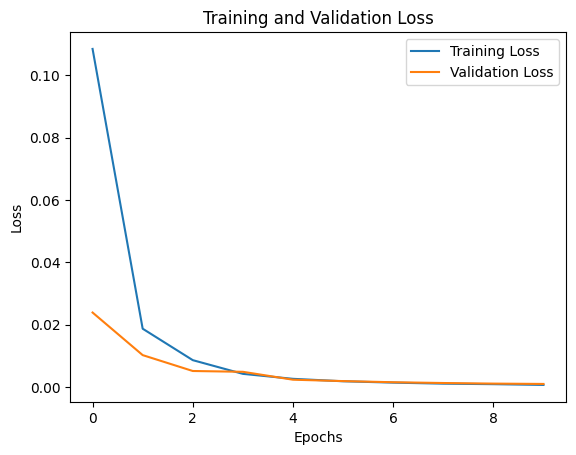

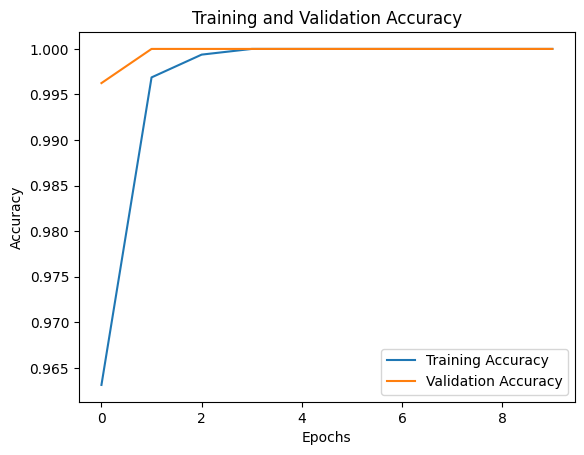

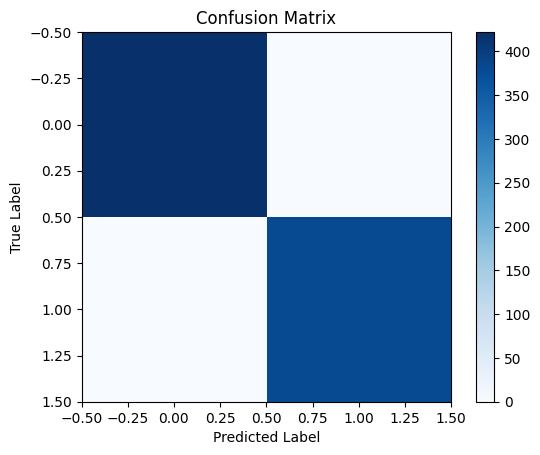

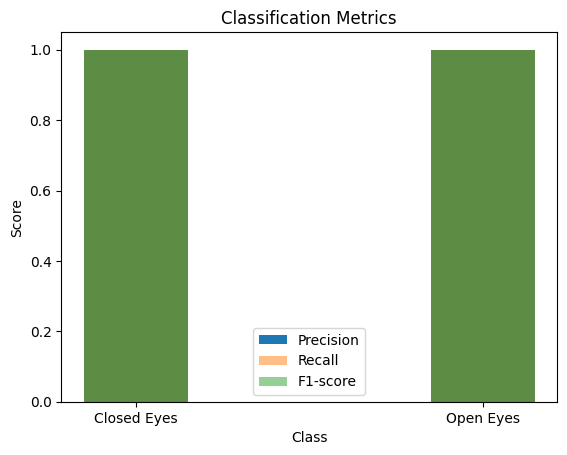

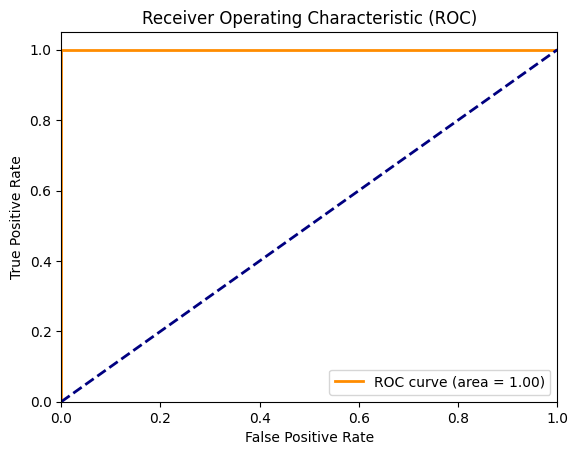

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.imshow(conf_mat, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification Report Visualization
precision = [1.0, 1.0]  # Placeholder for precision values (update with your actual values)
recall = [1.0, 1.0]  # Placeholder for recall values (update with your actual values)
f1_score = [1.0, 1.0]  # Placeholder for F1-score values (update with your actual values)

class_labels = ['Closed Eyes', 'Open Eyes']
x = range(len(class_labels))

plt.bar(x, precision, width=0.3, label='Precision')
plt.bar(x, recall, width=0.3, label='Recall', alpha=0.5)
plt.bar(x, f1_score, width=0.3, label='F1-score', alpha=0.5)
plt.xticks(x, class_labels)
plt.xlabel('Class')
plt.ylabel('Score')
plt.title('Classification Metrics')
plt.legend()
plt.show()

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [15]:
print("Shape of example_images:", example_images.shape)


Shape of example_images: (10, 4356)


In [17]:
print("Shape of images array:", images.shape)


Shape of images array: (4000, 100, 100, 3)


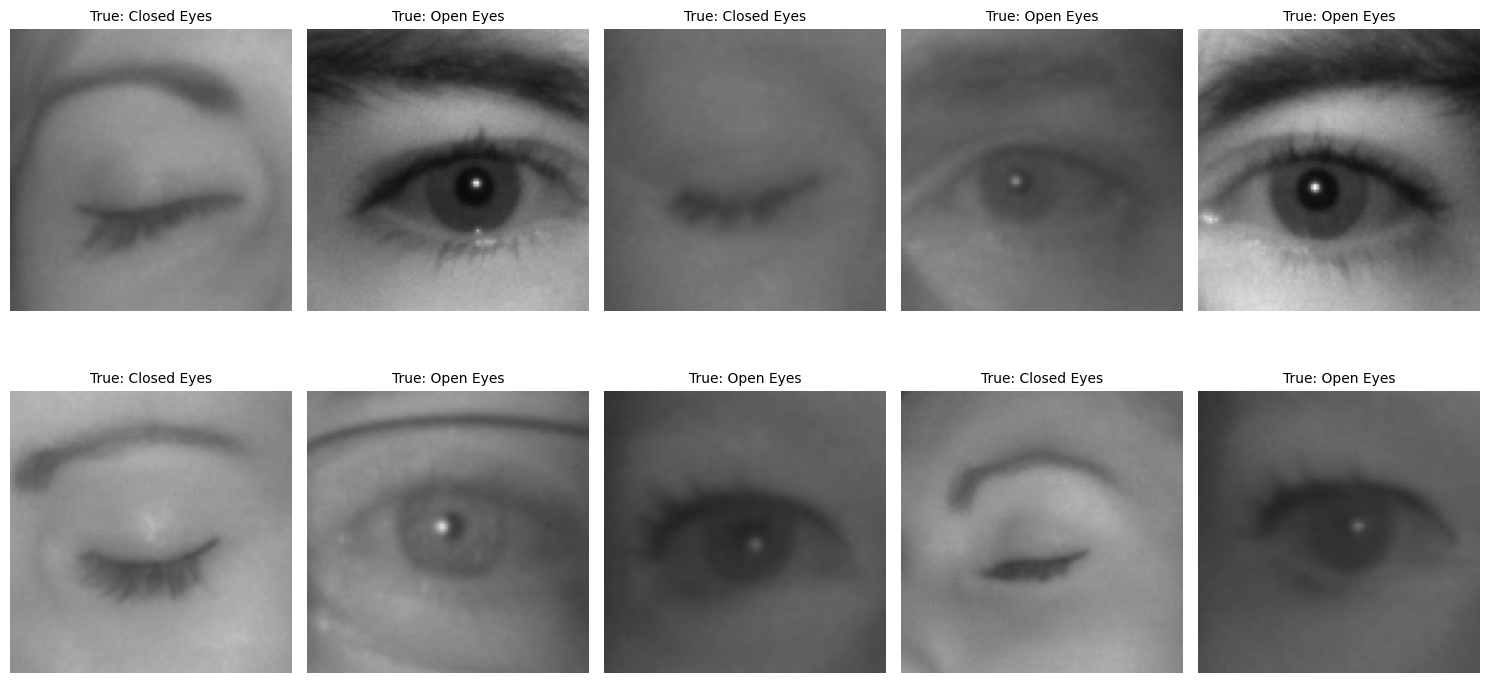

In [18]:
# Select 10 random examples from the testing dataset
num_examples = 10
random_indices = np.random.choice(len(images), num_examples, replace=False)
example_images = images[random_indices]
example_labels = labels[random_indices]

# Plot the images with their predicted labels
plt.figure(figsize=(15, 8))
for i in range(num_examples):
    plt.subplot(2, 5, i+1)
    plt.imshow(example_images[i])
    true_label = "Closed Eyes" if example_labels[i] == 0 else "Open Eyes"
    plt.title(f"True: {true_label}", fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


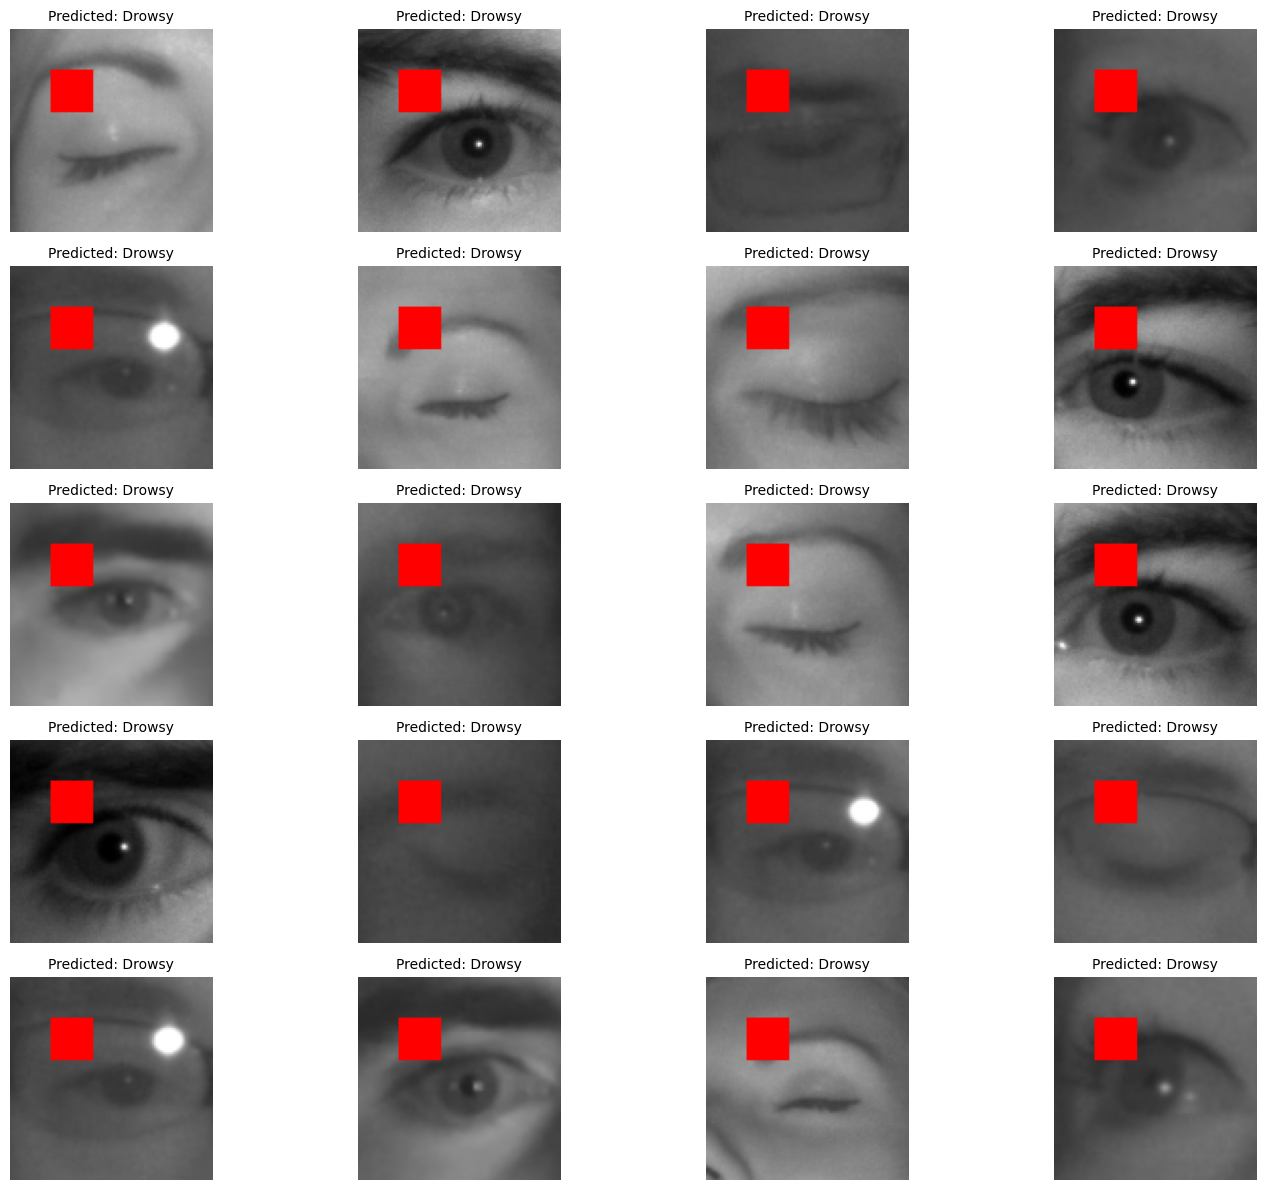

In [25]:
# Select 20 additional random images from the dataset
num_additional_images = 20
additional_random_indices = np.random.choice(len(images), num_additional_images, replace=False)
additional_images = images[additional_random_indices]

# Flatten each image and use the model to predict the state
predictions = []
for image in additional_images:
    flattened_image = image.flatten()[:4356].reshape(1, -1)  # Flatten and reshape the image
    prediction = model.predict(flattened_image)
    predictions.append(prediction)

predicted_labels = (np.array(predictions) > 0.5).astype(int).flatten()

# Plot the modified images with colored overlays
plt.figure(figsize=(15, 12))
for i in range(num_additional_images):
    image = additional_images[i].copy()
    label = predicted_labels[i]
    if label == 0:  # Drowsy
        color = (0, 0, 255)  # Red
    else:  # Awake
        color = (0, 255, 0)  # Green

    # Overlay a colored rectangle over the eyes region
    cv2.rectangle(image, (20, 20), (40, 40), color, -1)  # Example region, adjust as needed

    plt.subplot(5, 4, i+1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct display
    state = "Drowsy" if label == 0 else "Awake"
    plt.title(f"Predicted: {state}", fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [26]:
# Initialize lists to store the features, images, and labels
features = []
labels = []

# Load closed eyes images and extract HOG features
for filename in os.listdir(closed_eyes_dir):
    if filename.endswith(".png"):  # assuming your images are PNG files
        image_path = os.path.join(closed_eyes_dir, filename)
        image = cv2.imread(image_path)
        # Resize the image to the target size
        image = cv2.resize(image, target_size)
        # Convert the image to grayscale
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        # Extract HOG features
        hog_features = hog(gray_image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2-Hys")
        features.append(hog_features)
        labels.append(0)  # Closed eyes are labeled as 0 (drowsy)

# Load open eyes images and extract HOG features
for filename in os.listdir(open_eyes_dir):
    if filename.endswith(".png"):  # assuming your images are PNG files
        image_path = os.path.join(open_eyes_dir, filename)
        image = cv2.imread(image_path)
        # Resize the image to the target size
        image = cv2.resize(image, target_size)
        # Convert the image to grayscale
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        # Extract HOG features
        hog_features = hog(gray_image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2-Hys")
        features.append(hog_features)
        labels.append(1)  # Open eyes are labeled as 1 (awake)

# Convert lists to numpy arrays
features = np.array(features)
labels = np.array(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Define the input shape
input_shape = X_train.shape[1]

# Define the input layer
input_layer = Input(shape=(input_shape,))

# Define the Dense layers
dense_layer1 = layers.Dense(64, activation='relu')(input_layer)
output_layer = layers.Dense(1, activation='sigmoid')(dense_layer1)

# Define the model
model = models.Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the testing set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

# Make predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Compute classification metrics
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8501 - loss: 0.3485 - val_accuracy: 0.9962 - val_loss: 0.0378
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9946 - loss: 0.0336 - val_accuracy: 0.9962 - val_loss: 0.0181
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9996 - loss: 0.0142 - val_accuracy: 1.0000 - val_loss: 0.0086
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0083 - val_accuracy: 1.0000 - val_loss: 0.0056
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0051 - val_accuracy: 1.0000 - val_loss: 0.0040
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 1.0000 - loss: 0.0031 - val_accuracy: 1.0000 - val_loss: 0.0028
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0024 - val_accuracy: 1.0000 - val_loss: 0.0022
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accura